# Import libraries

In [1]:
#using KernelEstimator
using Distributions
using LinearAlgebra
using Plots
using DataFrames
using Statistics
using BlockArrays
using Shuffle
using Random
using Clustering
using Dates
using MarketData
using CSV
using StatsBase
using BlockDiagonals
using ScikitLearn
@sk_import metrics : silhouette_samples

PyObject <function silhouette_samples at 0x0000000066C1ECA0>

# Include jl file

In [13]:
include("Clustering.jl")

covToCorr

In [4]:
stocks = Symbol.(["AAPL", "MSFT", "GOOG", "AMZN", "TSLA", "FB", "JPM", "UNH",
"V", "JNJ", "HD", "WMT", "PG", "BAC", "MA", "PFE", "DIS", "AVGO",
"XOM", "ACM", "CSCO", "NFLX", "NKE", "LLY", "KO", "TMO", "CRM", "COST", "AAL", "TWTR"]);
start = DateTime(2020, 1, 1)
dataStocks = []
for symb in stocks
    data = DataFrames.DataFrame(yahoo(symb, YahooOpt(period1 = start)))
    adjustedClosePrice = data.AdjClose
    if getindex(stocks, 1) == symb
        time_stamp = data.timestamp
        dataStocks = hcat(time_stamp, adjustedClosePrice)
    else
        dataStocks = hcat(dataStocks, adjustedClosePrice)
    end
end
dataStocksPrices = DataFrames.DataFrame(dataStocks, :auto)
dataStocksPrices = DataFrames.rename(dataStocksPrices, names(dataStocksPrices).=>String.(append!([:Dates], stocks)))
CSV.write("Data_Prices.csv", dataStocksPrices)

"Data_Prices.csv"

In [5]:
dataStocksPrices = CSV.read("Data_Prices.csv", DataFrames.DataFrame)
first(dataStocksPrices, 10)

,Dates,AAPL,MSFT,GOOG,AMZN,TSLA,FB,JPM,UNH
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2020-01-02,73.7859,156.924,68.3685,94.9005,86.052,209.78,129.899,281.931
2,2020-01-03,73.0686,154.97,68.033,93.7485,88.602,208.67,128.185,279.078
3,2020-01-06,73.6508,155.371,69.7105,95.144,90.308,212.6,128.083,281.016
4,2020-01-07,73.3044,153.954,69.667,95.343,93.812,213.06,125.905,279.319
5,2020-01-08,74.4836,156.407,70.216,94.5985,98.428,215.22,126.888,285.209
6,2020-01-09,76.0657,158.361,70.9915,95.0525,96.268,218.3,127.351,283.589
7,2020-01-10,76.2376,157.628,71.4865,94.158,95.63,218.06,126.081,284.466
8,2020-01-13,77.8664,159.523,71.9615,94.565,104.972,221.91,127.128,275.522
9,2020-01-14,76.815,158.4,71.544,93.472,107.584,219.06,128.611,277.825


In [6]:
dataStocksReturns = percentChange(dataStocksPrices)[1:end, :]
CSV.write("Data_Returns.csv", dataStocksReturns)

"Data_Returns.csv"

In [7]:
dataStocksReturns = CSV.read("Data_Returns.csv", DataFrames.DataFrame)
dataStocksReturns = dataStocksReturns[2:end, :]
first(dataStocksReturns, 10)

,AAPL,MSFT,GOOG,AMZN,TSLA,FB,JPM
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.0097221,-0.0124516,-0.00490727,-0.012139,0.0296332,-0.00529126,-0.0131964
2,0.00796837,0.00258474,0.0246572,0.0148856,0.0192547,0.0188336,-0.00079529
3,-0.00470303,-0.0091178,-0.000624052,0.00209162,0.0388005,0.00216365,-0.0170003
4,0.0160863,0.0159285,0.00788039,-0.00780864,0.0492048,0.010138,0.00780098
5,0.0212406,0.0124929,0.0110445,0.00479918,-0.021945,0.0143109,0.00365111
6,0.00226056,-0.00462686,0.00697271,-0.0094106,-0.00662734,-0.00109943,-0.00996788
7,0.0213646,0.012024,0.00664458,0.00432257,0.097689,0.0176557,0.0083045
8,-0.0135033,-0.0070429,-0.00580175,-0.0115582,0.0248828,-0.0128431,0.0116618
9,-0.00428553,0.00647614,0.0058146,-0.00396912,-0.0361021,0.00954075,-0.0149857


# Snippet 4-1

In [8]:
covariance = cov(Matrix(dataStocksReturns))
correlation = cor(Matrix(dataStocksReturns));

In [9]:
correlationNew, clusters, silh, index = clusterKMeansBase(correlation);
clusters

Dict{String, Vector{Int64}} with 3 entries:
  "1" => [1, 2, 3, 4, 5, 6, 18, 22, 27, 30]
  "2" => [7, 8, 9, 11, 14, 15, 17, 19, 20, 21, 23, 25, 29]
  "3" => [10, 12, 13, 16, 24, 26, 28]

# Snippet 4-2

In [11]:
correlation = DataFrames.DataFrame(correlation, :auto)
DataFrames.rename!(correlation, Symbol.(names(correlation)) .=> stocks)

,AAPL,MSFT,GOOG,AMZN,TSLA,FB,JPM,UNH
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,0.808668,0.714597,0.65823,0.518618,0.646529,0.468642,0.5509
2,0.808668,1.0,0.805775,0.690219,0.512592,0.657964,0.489936,0.595092
3,0.714597,0.805775,1.0,0.663128,0.457051,0.717085,0.501045,0.535961
4,0.65823,0.690219,0.663128,1.0,0.468919,0.638033,0.266349,0.344372
5,0.518618,0.512592,0.457051,0.468919,1.0,0.389915,0.281593,0.260274
6,0.646529,0.657964,0.717085,0.638033,0.389915,1.0,0.367974,0.387121
7,0.468642,0.489936,0.501045,0.266349,0.281593,0.367974,1.0,0.552925
8,0.5509,0.595092,0.535961,0.344372,0.260274,0.387121,0.552925,1.0
9,0.637094,0.689607,0.662001,0.441241,0.38632,0.531273,0.661657,0.605965


In [14]:
corr, clusters, silh = clusterKMeansTop(correlation, numberClusters = nothing, iterations = 10);
clusters

Dict{String, Vector{String}} with 3 entries:
  "1" => ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA", "FB", "AVGO", "NFLX", "CRM", …
  "2" => ["JPM", "UNH", "V", "HD", "BAC", "MA", "DIS", "XOM", "ACM", "CSCO", "N…
  "3" => ["JNJ", "WMT", "PG", "PFE", "LLY", "TMO", "COST"]

# Snippet 4-3

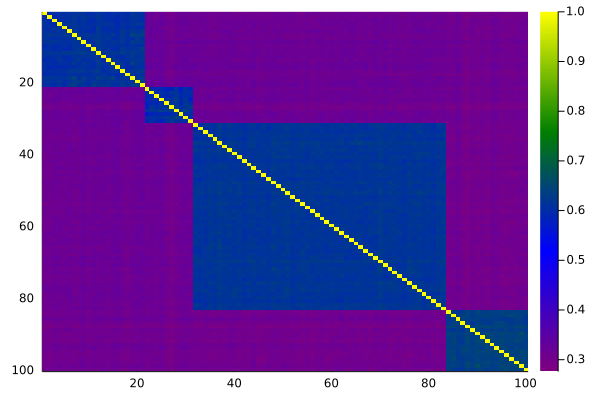

In [15]:
correlation = randomBlockCorrelation(100, 4)
heatmap(Matrix(correlation), c = cgrad([:purple, :blue, :green, :yellow]), yflip = true)

In [6]:
N = [20, 40, 80, 160]
iters = collect(1:1000)
M = 2
results = DataFrames.DataFrame(K_per_N = [], Ratio = [])
for n in N
    for k in range(3, step = 3, stop = div(n, 2))
        cls = 0
        for iter in iters
            corr0 = randomBlockCorr(n, k; minBlockSize = M)
            corr, clusters, silh = clusterKMeansTop(corr0, maxNumClusters = nothing, n_init = 10)
            cls += length(keys(clusters))
        end
        ratio = cls/k
        push!(results, [k/n, ratio])
    end
end
CSV.write("Data.csv", results)

"Data_20_10.csv"